# Árboles de decisión

##  Cristina Gómez Alonso, Carlos Tessier

En este notebook utilizaremos como referencia el material de Aurelien Géron, sintetizado por Akranz, para explicar cómo entrenar, validar y realizar predicciones con **árboles de decisión** utilizando el dataset *Iris* y la librería **Scikit-learn**.

El dataset *Iris* es un conjunto clásico procedente del **UCI Machine Learning Repository**:
[https://archive.ics.uci.edu/ml/datasets/iris](https://archive.ics.uci.edu/ml/datasets/iris)

A continuación revisaremos el algoritmo de entrenamiento **CART**, que es el que emplea `scikit-learn`, veremos cómo **regularizar** árboles para evitar sobreajuste y cómo utilizarlos también en **tareas de regresión**. Para finalizar, analizaremos varias **limitaciones** de los árboles de decisión y en qué situaciones no son la mejor opción.

## ¿Qué son los Árboles de Decisión?

Un árbol de decisión es una estructura que representa, de forma gráfica e interpretable, una serie de decisiones basadas en condiciones sobre las características del conjunto de datos. Es un algoritmo de **aprendizaje supervisado** muy usado, capaz de resolver tanto **clasificación** como **regresión**, y destaca por su simplicidad e interpretabilidad.

![arbol de decisión](https://miro.medium.com/v2/resize:fit:640/format:webp/1*BEH9fghOd9iYeGu8obk3PQ.png)

Principales características de los árboles de decisión:

* Clasifican los datos a partir de condiciones basadas en los atributos.
* Son una técnica de clasificación muy extendida en machine learning.
* Son modelos fáciles de interpretar, incluso por personas no expertas.
* También pueden utilizarse en regresión para estimar valores numéricos (ventas mensuales, precio de un vehículo, etc.).

Más información:

* [Wikipedia — Decision Tree Learning](https://en.wikipedia.org/wiki/Decision_tree_learning)
* [Tutorial de Kaggle](https://www.kaggle.com/prashant111/decision-tree-classifier-tutorial)







## Índice Gini

El índice Gini es la función de coste utilizada por defecto para evaluar la calidad de las divisiones en un árbol de decisión.

Una división en el conjunto de datos se define por un atributo de entrada y un umbral para dicho atributo, lo que permite separar los datos de entrenamiento en dos subconjuntos.

El valor del índice Gini mide el **grado de impureza** de los nodos resultantes, es decir, cuán mezcladas están las clases en cada subconjunto.
Una separación perfecta produce un índice Gini de **0**, mientras que la máxima impureza en un problema de **dos clases** se da cuando las clases están repartidas al 50 %, produciendo un valor de **0,5**.

---

## Entropy

`Entropy` es otra medida de impureza utilizada en árboles de decisión, basada en la **teoría de la información**. Mientras que el índice Gini mide la probabilidad de error al clasificar un elemento al azar, `entropy` mide la **incertidumbre** del sistema.

En la práctica:

* **Gini** es **más rápido de calcular** y por eso se usa por defecto en muchas implementaciones.
* **Entropy** es **más sensible a cambios en la distribución de las clases**.
* Ambos criterios suelen producir **árboles muy similares**.
* No existe un criterio universalmente mejor: la diferencia suele ser **pequeña y dependiente del problema**.



## 1. Importación de paquetes y dataset

Para entender los árboles de decisión, comencemos por construir uno y consultar sus predicciones:

In [1]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = load_iris()

## 2. División del dataset

In [3]:
X = iris.data [:, 2:]  # Use only petal length and petal width
y = iris.target
X.shape, y.shape

((150, 2), (150,))

## 3. Creación del modelo de Árboles de decisión

In [4]:
tree_clf = DecisionTreeClassifier(max_depth=2)

## 4. Entrenamiento

In [5]:
tree_clf.fit(X, y)

DecisionTreeClassifier(max_depth=2)

## 5. Visualización del árbol de decisión

Podemos visualizar el árbol de decisiones utilizando el método export_graphiz() para exportar un archivo de representación gráfica y luego transformarlo a png:

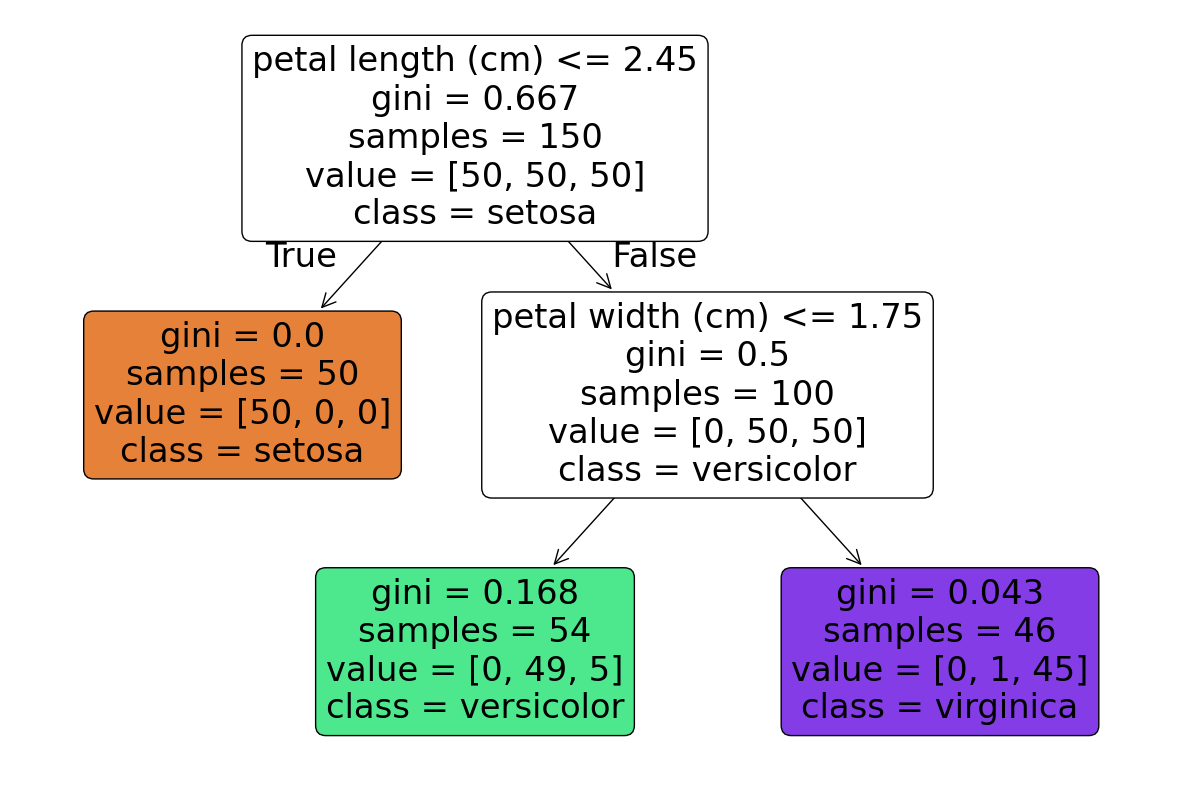

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the figure size so the tree is legible
plt.figure(figsize=(15, 10))

# Plot the tree
plot_tree(tree_clf, 
          filled=True, 
          feature_names=iris.feature_names[2:],
          class_names=iris.target_names,
          rounded=True)

plt.show()



## 8. Realización de predicciones — Versión revisada para el alumnado

Para clasificar un nuevo dato con un árbol de decisión seguimos un proceso muy directo: empezamos en el nodo raíz (la parte superior del árbol) y vamos respondiendo las preguntas binarias que aparecen en cada nodo. En cada paso avanzamos hacia la rama que corresponde a la condición que se cumple. Cuando llegamos a una hoja, esa hoja indica la clase final que el modelo asigna al dato.

Una ventaja importante de los árboles de decisión es que **apenas necesitan preparación de datos**: no es necesario escalar ni normalizar las variables, ya que las divisiones se basan en valores umbral y no en distancias.

Cada nodo del árbol incluye varios atributos que ayudan a interpretar cómo está tomando decisiones:

* **samples (muestras)**: cuántas instancias del conjunto de entrenamiento llegaron hasta ese nodo.
* **value (valor)**: cuántas muestras hay de cada clase dentro del nodo.
* **gini**: medida de impureza. Si un nodo tiene solo una clase, su impureza es 0 (es un nodo “puro”).

El índice Gini del nodo ( i ) se calcula mediante:

$
G_i = 1 - \sum_{k=1}^{n} p_{i,k}^2
$]$

donde $ p_{i,k} $ es la proporción de muestras de la clase $ k $ dentro del nodo. En nuestro caso, $ k \in {1,2,3} $.

En `scikit-learn`, los árboles se entrenan con el algoritmo **CART**, que siempre genera árboles binarios: cada nodo de decisión tiene dos ramas. Otros algoritmos clásicos, como **ID3**, sí pueden crear nodos con más de dos hijos.

En la figura siguiente se aprecia cómo un árbol va creando divisiones rectangulares en el espacio de características. Este comportamiento hace que los límites de decisión tengan forma de líneas rectas y zonas rectangulares:

![Boundaries](https://qu4nt.github.io/sklearn-doc-es/_images/sphx_glr_plot_iris_dtc_001.png)

En general, los árboles de decisión:

* son **intuitivos**
* sus predicciones se pueden **interpretar fácilmente**
* se consideran modelos de **“caja blanca”**

En contraste, métodos como **Random Forest** o las **redes neuronales profundas** se consideran modelos de **“caja negra”**, ya que resulta mucho más difícil interpretar cómo llegan a sus decisiones internas.





### 8.1. Estimando las probabilidades de pertenencia a cada clase

Un árbol de decisión también permite **estimar la probabilidad** de que una instancia pertenezca a cada clase. Para ello, toma la **hoja** en la que cae el dato y calcula la probabilidad como:

> proporción de muestras de esa clase
> entre el total de muestras presentes en la hoja.

En `scikit-learn`, estas probabilidades pueden consultarse con el método `predict_proba()`.

Por ejemplo, si introducimos una flor con **longitud de pétalo = 5** y **ancho de pétalo = 1.5**, el árbol puede devolver algo como:

* Clase 0 → 0.00
* Clase 1 → 0.90
* Clase 2 → 0.09

Lo que significa que, según el modelo, la clase más probable es la **clase 1**.



In [7]:
tree_clf.predict_proba([[5, 1.5]])

array([[0.        , 0.90740741, 0.09259259]])

In [8]:
tree_clf.predict([[5, 1.5]])

array([1])


**Nota:** obtendremos la misma probabilidad para cualquier punto que caiga en la **misma hoja** del árbol. Aunque el nuevo dato esté más cerca o más lejos de los límites de decisión (*decision boundaries*), la probabilidad no cambia, porque todas las muestras dentro de una misma hoja comparten la misma distribución de clases.




## Regularización y sobreajuste en Árboles de Decisión

### ¿Por qué los árboles sobreajustan?

Los árboles de decisión tienden a **crecer demasiado** si no se les pone límite. Un árbol sin restricciones seguirá dividiéndose hasta separar completamente las muestras del conjunto de entrenamiento. Esto suele producir:

* **Exactitud perfecta en entrenamiento** (accuracy = 1.0)
* **Peor rendimiento en test**, porque el árbol aprende ruido y particularidades del dataset, no patrones generales.

Ejemplo simple con *Iris*:

```python
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

print("Train accuracy:", clf.score(X_train, y_train))
print("Test accuracy:", clf.score(X_test, y_test))
```

Salida típica:

```
Train accuracy: 1.0
Test accuracy: 0.88
```

La diferencia entre ambos valores indica **overfitting**.

---

## ¿Cómo evitar el sobreajuste?

La solución es **controlar la complejidad del árbol** mediante **hiperparámetros de regularización**. 

### Ejemplo visual: árbol sin podar vs. árbol podado

En los árboles de decisión, **podar (pruning)** consiste en eliminar ramas que aportan poca información o que no mejoran la capacidad predictiva del modelo. El objetivo es obtener un árbol **más simple**, **más generalizable** y con **menor riesgo de sobreajuste**.

![ejemplo pruning](https://miro.medium.com/v2/resize:fit:720/format:webp/1*WQfd2tteLlic7-pu_FxjfQ.png)

Este ejemplo muestra claramente la diferencia entre ambos modelos:

* **Árbol sin podar:**

  * Tiene más nodos y más profundidad.
  * Captura el ruido del conjunto de entrenamiento.
  * Presenta mayor varianza y tiende a sobreajustar.

* **Árbol podado:**

  * Es más pequeño y fácil de interpretar.
  * Elimina ramas poco relevantes.
  * Generaliza mejor a datos nuevos.

Los **hiperparámetros de regularización** más importantes son:

---

### 1. `max_depth`

Límite máximo de profundidad del árbol.

* Árbol más profundo → más complejo → más riesgo de overfitting.
* Árbol menos profundo → más simple → mejor generalización.

Ejemplo:

```python
clf = DecisionTreeClassifier(max_depth=5)
```

---

### 2. `min_samples_leaf`

Número mínimo de muestras que debe haber en una hoja.

* Obliga al árbol a no crear hojas con muy pocos datos.
* Reduce el ruido y suaviza las predicciones.

```python
clf = DecisionTreeClassifier(min_samples_leaf=10)
```

---

### 3. `min_samples_split`

Número mínimo de muestras necesarias para dividir un nodo.

* Evita divisiones innecesarias cuando hay muy pocas muestras disponibles.

```python
clf = DecisionTreeClassifier(min_samples_split=20)
```

---






## Búsqueda automática de mejores hiperparámetros

Podemos usar `GridSearchCV` para probar diferentes combinaciones y elegir las que mejor funcionen:

``` python
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 20, 30]
}

clf = DecisionTreeClassifier()
grid = GridSearchCV(clf, param_grid, cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_)
```

Esto permite al alumnado ver de forma práctica cómo mejorar un árbol sin adivinar los valores "a ojo".

---

## Post-pruning (poda tras el entrenamiento)

Además de limitar el crecimiento del árbol desde el principio (pre-pruning), también existe la **poda posterior**, que elimina ramas poco útiles una vez entrenado el árbol completo.

En `scikit-learn` se implementa con el parámetro:

* **`ccp_alpha`** → controla cuánto se poda el árbol.

Un valor más alto = árbol más pequeño.

Ejemplo final con un `ccp_alpha` ya elegido:

``` python

clf = DecisionTreeClassifier(ccp_alpha=0.02)
clf.fit(X_train, y_train)
```

##  **Ejercicio propuesto: Crear un modelo de Árbol de Decisión para los mismos datasets utilizados en la práctica de Regresión Logística**

El objetivo de esta actividad es que el alumnado aprenda a:

* Entrenar un **árbol de decisión** sobre un dataset ya preprocesado.
* Comparar su rendimiento frente al modelo de **regresión logística** visto en el notebook.
* Identificar posibles casos de **sobreajuste** y aplicar **regularización**.
* Interpretar las **reglas de decisión** y la **importancia de variables**.

El alumnado debe trabajar con **los mismos datasets** utilizados en el notebook:

* **Hipotiroidismo (hypothyroid.csv)** 
* **Titanic (titanic_train.csv)** 

### **PARTE 1 – Árbol de Decisión aplicado al dataset de Hipotiroidismo**

<div style="background-color:green;color:white">

<br>

Implementar el mismo flujo del notebook (carga → limpieza → transformación → división)

<br>

La limpieza de datos será un calco exacto de la que ya hice en el ejercicio 2.3. Todas las explicaciones están ahí y por eso no voy a perder tiempo en repetirme.

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# importar dataset, preprocesar, escalar y dividir en train y test
names = 'response age sex on_thyroxine query_on_thyroxine antithyroid_medication thyroid_surgery query_hypothyroid query_hyperthyroid pregnant \
sick tumor lithium goitre TSH_measured TSH T3_measured \
T3 TT4_measured TT4 T4U_measured T4U FTI_measured FTI TBG_measured TBG'

variables = names.split()

In [13]:
df = pd.read_csv("./data/hypothyroid.csv", names=variables, index_col=False)
df.head()

,response,age,sex,on_thyroxine,query_on_thyroxine,antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.6,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.7,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.2,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.4,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.2,y,57,y,1.28,y,44,n,?


In [14]:
df.shape

(3163, 26)

In [15]:
# Crea una lista vacía donde guardaremos nombres de columnas a eliminar
redundant_cols = []

# Recorre todos los nombres de columnas del DataFrame 
    # Si el nombre de la columna contiene 'measured' o 'query'
        # Añade ese nombre de columna a la lista con las columnas a eliminar
for col in df.columns:
    if "measured" in col or "query" in col:
        redundant_cols.append(col)

print(redundant_cols)

['query_on_thyroxine', 'query_hypothyroid', 'query_hyperthyroid', 'TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured']


In [16]:
redundant_cols.append("TBG")

In [17]:
df.drop(columns=redundant_cols, inplace=True)
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,hypothyroid,72,M,f,f,f,f,f,f,f,f,30,0.6,15,1.48,10
1,hypothyroid,15,F,t,f,f,f,f,f,f,f,145,1.7,19,1.13,17
2,hypothyroid,24,M,f,f,f,f,f,f,f,f,0,0.2,4,1,0
3,hypothyroid,24,F,f,f,f,f,f,f,f,f,430,0.4,6,1.04,6
4,hypothyroid,77,M,f,f,f,f,f,f,f,f,7.3,1.2,57,1.28,44


In [18]:
df.describe()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
count,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163,3163
unique,2,93,3,2,2,2,2,2,2,2,2,240,70,269,159,281
top,negative,?,F,f,f,f,f,f,f,f,f,0,?,?,?,?
freq,3012,446,2182,2702,3121,3059,3100,3064,3123,3161,3064,894,695,249,248,247


In [20]:
for col in df.columns:
    df[col] = df[col].replace("?", np.nan)

df.isna().sum()

response                    0
age                       446
sex                        73
on_thyroxine                0
antithyroid_medication      0
thyroid_surgery             0
pregnant                    0
sick                        0
tumor                       0
lithium                     0
goitre                      0
TSH                       468
T3                        695
TT4                       249
T4U                       248
FTI                       247
dtype: int64

In [21]:
df.dropna(inplace=True)
df.shape
df['response'].unique()

array(['hypothyroid', 'negative'], dtype=object)

In [23]:
def class_convert(value):
    return 1 if value == "hypothyroid" else 0

df["response"] = df["response"].apply(class_convert)

In [24]:
df.head()

,response,age,sex,on_thyroxine,antithyroid_medication,thyroid_surgery,pregnant,sick,tumor,lithium,goitre,TSH,T3,TT4,T4U,FTI
0,1,72,M,f,f,f,f,f,f,f,f,30,0.6,15,1.48,10
1,1,15,F,t,f,f,f,f,f,f,f,145,1.7,19,1.13,17
2,1,24,M,f,f,f,f,f,f,f,f,0,0.2,4,1,0
3,1,24,F,f,f,f,f,f,f,f,f,430,0.4,6,1.04,6
4,1,77,M,f,f,f,f,f,f,f,f,7.3,1.2,57,1.28,44


In [25]:
def print_type(col):
    print(f"{col}: {df[col].dtype}")

# Columnas a convertir a int
int_cols = ["age"]

# Columnas a convertir a float
float_cols = ["TSH", "T3", "TT4", "T4U", "FTI"]

print("Tipos antes de convertir:")
for col in int_cols:
    print_type(col)
for col in float_cols:
    print_type(col)

for col in int_cols:
    df[col] = df[col].astype(int)

for col in float_cols:
    df[col] = df[col].astype(float)

print("Tipos después de convertir:")
for col in int_cols:
    print_type(col)
for col in float_cols:
    print_type(col)

Tipos antes de convertir:
age: object
TSH: object
T3: object
TT4: object
T4U: object
FTI: object
Tipos después de convertir:
age: int64
TSH: float64
T3: float64
TT4: float64
T4U: float64
FTI: float64


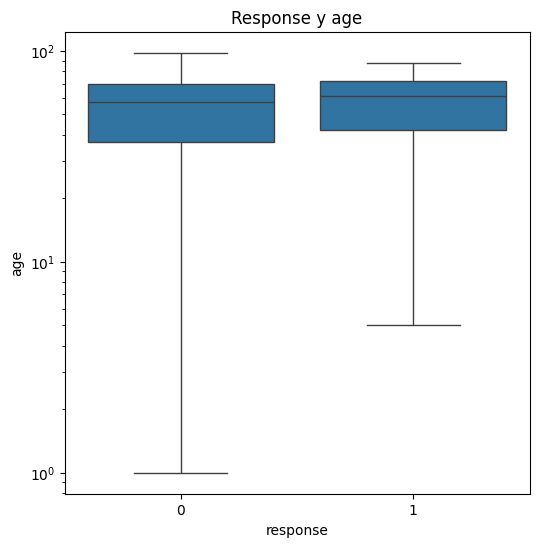

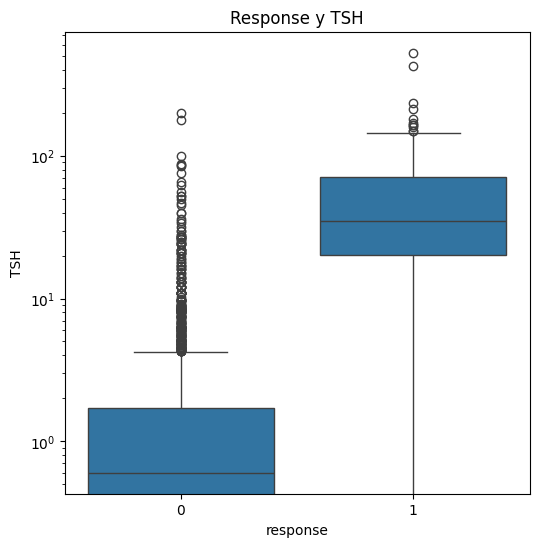

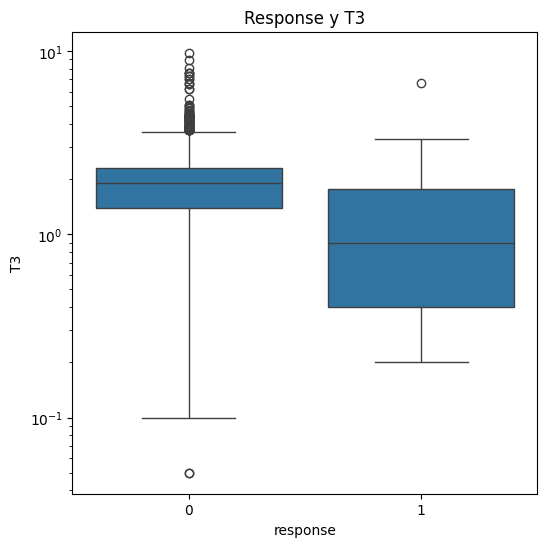

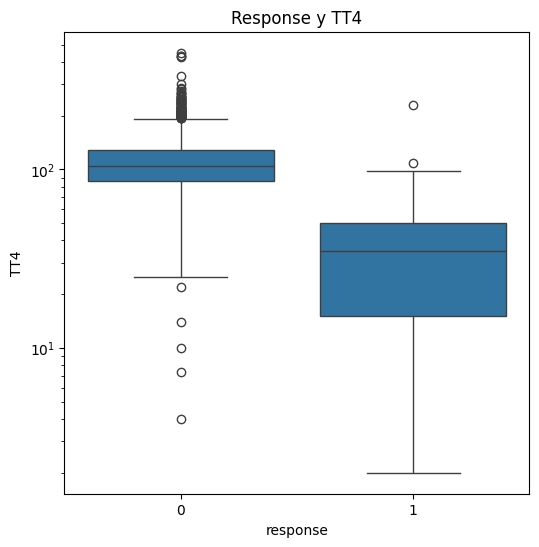

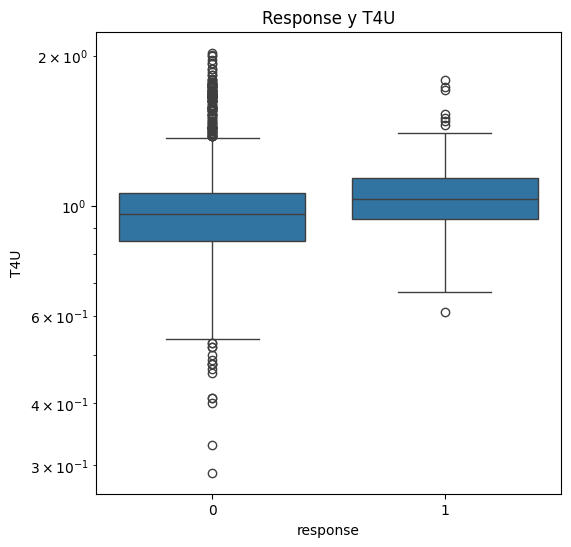

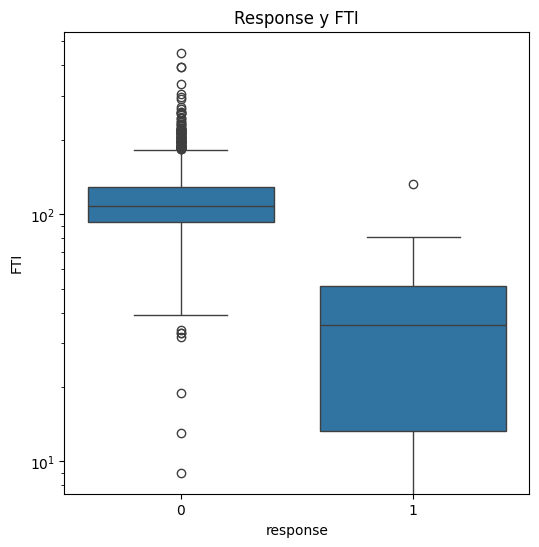

In [26]:
cols_boxplot = ["age", "TSH", "T3", "TT4", "T4U", "FTI"]

def boxplot_outliers():
    for col in cols_boxplot:
        plt.figure(figsize = (6, 6))
        sns.boxplot(x = "response", y = col, data = df)
        plt.title(f"Response y {col}")
        plt.yscale('log')
        plt.show()

boxplot_outliers()

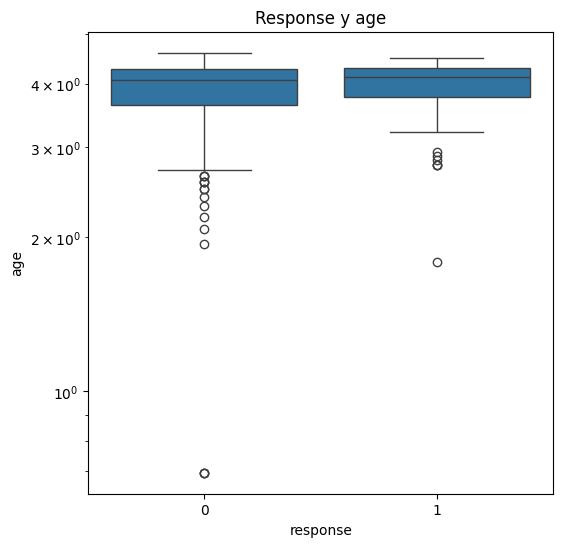

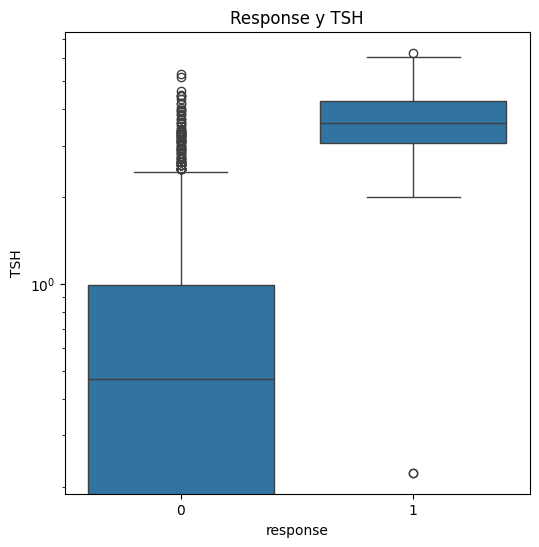

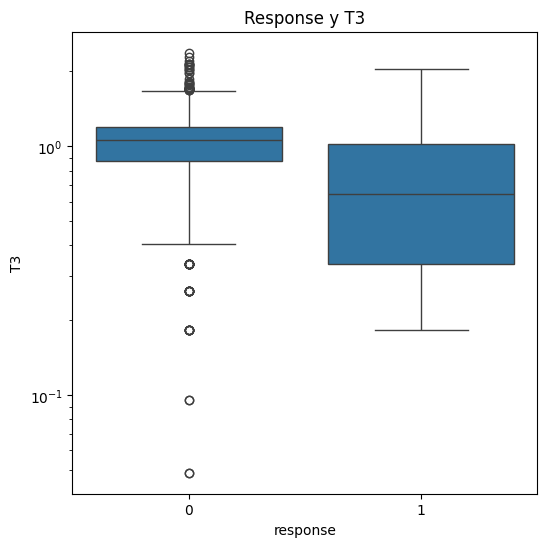

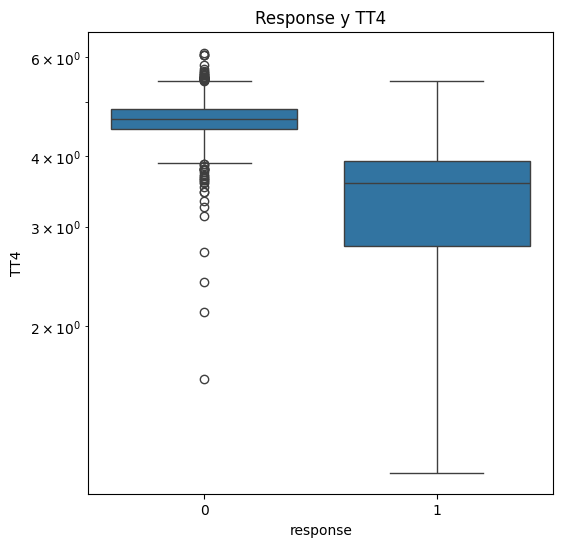

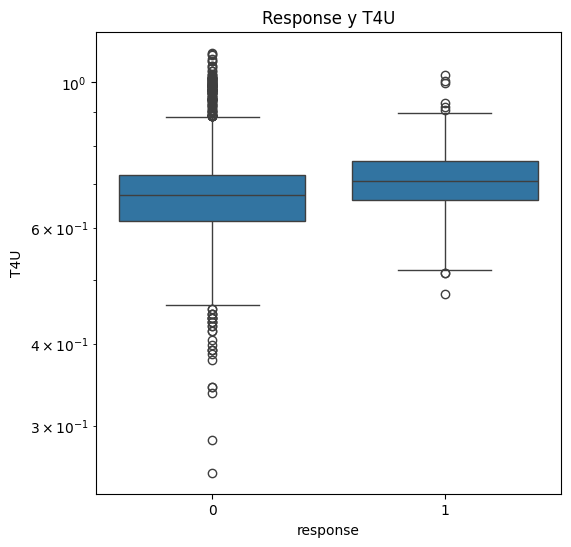

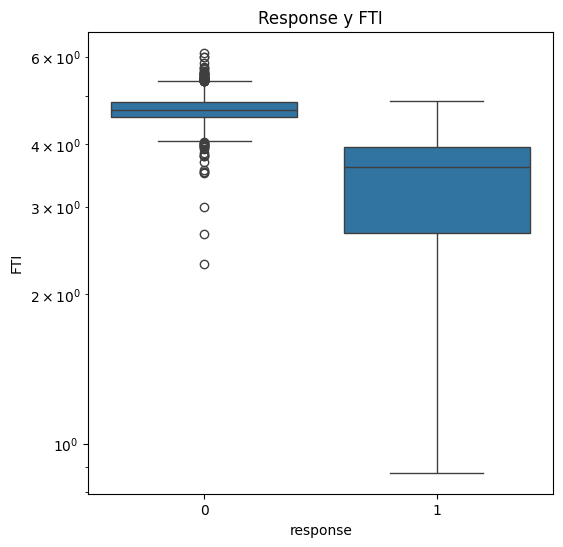

In [27]:
for col in cols_boxplot:
    df[col] = np.log1p(df[col])

boxplot_outliers()

In [28]:
categoric_cols = ["sex", "on_thyroxine", "antithyroid_medication", "thyroid_surgery", "pregnant", "sick", "tumor", "lithium", "goitre"]

df = pd.get_dummies(df, columns=categoric_cols, drop_first=True)
df.head()

,response,age,TSH,T3,TT4,T4U,FTI,sex_M,on_thyroxine_t,antithyroid_medication_t,thyroid_surgery_t,pregnant_t,sick_t,tumor_t,lithium_t,goitre_t
0,1,4.290459,3.433987,0.470004,2.772589,0.908259,2.397895,True,False,False,False,False,False,False,False,False
1,1,2.772589,4.983607,0.993252,2.995732,0.756122,2.890372,False,True,False,False,False,False,False,False,False
2,1,3.218876,0.000000,0.182322,1.609438,0.693147,0.000000,True,False,False,False,False,False,False,False,False
3,1,3.218876,6.066108,0.336472,1.945910,0.712950,1.945910,False,False,False,False,False,False,False,False,False
4,1,4.356709,2.116256,0.788457,4.060443,0.824175,3.806662,True,False,False,False,False,False,False,False,False


In [29]:
from sklearn.model_selection import train_test_split

x = df.drop(columns=["response"])
y = df["response"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print(f"x_train: {x_train.shape} | x_test: {x_test.shape}")

x_train: (1400, 15) | x_test: (600, 15)


---

<div style="background-color:green;color:white">

#### **1. Crear el modelo de árbol básico**

<br>

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [32]:
y_preds = model.predict(x_test)

#### **2. Evaluar rendimiento**

<div style="background-color:green;color:white">

Calcular:

* Accuracy
* Recall
* F1-score
* Matriz de confusión

<br>

In [33]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
print(f"Reporte:\n {classification_report(y_test, y_preds)}")

Accuracy: 0.98
Reporte:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       569
           1       0.81      0.81      0.81        31

    accuracy                           0.98       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.98      0.98      0.98       600



In [34]:
print(f"Matriz de confusión: \n {confusion_matrix(y_test, y_preds)}")

Matriz de confusión: 
 [[563   6]
 [  6  25]]


#### **3. Detectar sobreajuste**

<div style="background-color:green;color:white">

Comprobar el score de train y test:

<br>

In [46]:
print(f"Train: {model.score(x_train, y_train)}")
print(f"Test: {model.score(x_test, y_test)}")

Train: 1.0
Test: 0.98


<div style="background-color:green;color:white">

<br>

¿Tu modelo tiene accuracy perfecto en entrenamiento pero baja en test?

<br>

La accuracy es perfecta en entrenamiento y ligeramente más baja en test, pero no presenta demasiado cambio. Esto puede deberse a un sobreajuste combinado con pocos datos en test. Seguramente si los datos de test incrementasen, la accuracy bajaría más.

#### **4. Aplicar regularización**

<div style="background-color:green;color:white">

<br>

Entrenar nuevos modelos cambiando:

* *max_depth*
* *min_samples_leaf*
* *min_samples_split*

Puedes usar *GridSearchCV* para probar diferentes combinaciones y elegir las que mejor funcionen


<br>

In [41]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 20, 30]
}

reg_tree = DecisionTreeClassifier()
grid = GridSearchCV(reg_tree, param_grid, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)

y_preds_reg = grid.predict(x_test)


{'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 10}



<div style="background-color:green;color:white">

<br>

Comparar rendimiento entre:

* Árbol sin regularización
* Árbol regularizado


<br>

In [49]:
print("-- Arbol SIN Regularización --")
print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
print(f"Reporte:\n {classification_report(y_test, y_preds)}")
print(f"Matriz de confusión: \n {confusion_matrix(y_test, y_preds)}")

print(f"Accuracy (Train): {model.score(x_train, y_train)}")
print(f"Accuracy (Test): {model.score(x_test, y_test)}")

print("\n-- Arbol CON Regularización --")
print(f"Accuracy: {accuracy_score(y_test, y_preds_reg)}")
print(f"Reporte:\n {classification_report(y_test, y_preds_reg)}")
print(f"Matriz de confusión: \n {confusion_matrix(y_test, y_preds_reg)}")

print(f"Accuracy (Train): {grid.score(x_train, y_train)}")
print(f"Accuracy (Test): {grid.score(x_test, y_test)}")

-- Arbol SIN Regularización --
Accuracy: 0.98
Reporte:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99       569
           1       0.81      0.81      0.81        31

    accuracy                           0.98       600
   macro avg       0.90      0.90      0.90       600
weighted avg       0.98      0.98      0.98       600

Matriz de confusión: 
 [[563   6]
 [  6  25]]
Accuracy (Train): 1.0
Accuracy (Test): 0.98

-- Arbol CON Regularización --
Accuracy: 0.9883333333333333
Reporte:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       569
           1       0.93      0.84      0.88        31

    accuracy                           0.99       600
   macro avg       0.96      0.92      0.94       600
weighted avg       0.99      0.99      0.99       600

Matriz de confusión: 
 [[567   2]
 [  5  26]]
Accuracy (Train): 0.9885714285714285
Accuracy (Test): 0.9883333333333333


El árbol con regularización parece más fiable, principalmente porque la precisión en test y en entrenamiento es muy parecida. Además, en la matriz de confusión clasifica mejor un dato que el árbol sin regularizar.

#### **5. Interpretar importancia de variables**

<br>

<div style="background-color:green;color:white">

1. ¿Qué variable aparece como la más influyente para detectar hipotiroidismo?
2. ¿Coincide con lo observado con la regresión logística (coeficientes)? 

<br>

**Valores de la regresión logística:**

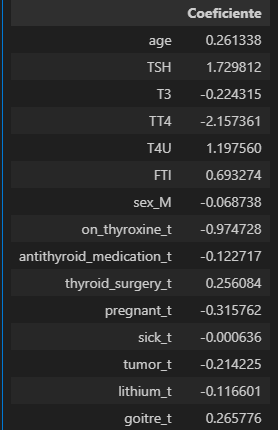

**Valores del árbol:**

In [52]:
importancia = model.feature_importances_
nombres = x_train.columns

df_imp = pd.DataFrame({'Variable': nombres, 'Importancia': importancia})
df_imp = df_imp.sort_values('Importancia', ascending=False)
df_imp

,Variable,Importancia
5,FTI,0.714575
1,TSH,0.171204
0,age,0.030226
7,on_thyroxine_t,0.029382
3,TT4,0.016561
4,T4U,0.014780
8,antithyroid_medication_t,0.012641
2,T3,0.010631
6,sex_M,0.000000
9,thyroid_surgery_t,0.000000


La importancia de las variables es completamente distinta:

- `FTI`: Es la más importante en el árbol (`0.71`). Al contrario que `TT4`, que es la más importante en la regresión logística (`-2.15`)
- `TT4`: En el árbol no presenta demasiada importancia, mientras que en la regresión logística es la más importante, como hemos mencionado anteriormente.
- `TSH`: Se presenta como una variable relativamente importante para ambos (segunda variable para el árbol y para la regresión, pero no con el mismo peso: `0.17` y `1.72` respectivamente).
- Variables sin importancia: Tenemos muchas variables a las que el árbol no les ha dado ningún peso y se mantienen en `0.00`. Por otro lado, en la regresión logística, todas las variables tienen un peso, por poco que sea.

### **PARTE 2 – Árbol de Decisión aplicado al dataset del Titanic**

Usando exactamente el mismo preprocesamiento del notebook de regresión logística, se pide repetir el análisis:





In [53]:
df = pd.read_csv("data/titanic_train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Omito las visualizaciones ya hechas en el ejercicio 2.3.

In [54]:
age_median = df["Age"].median()
df["Age"] = df["Age"].replace(np.nan, age_median)

In [55]:
df = pd.get_dummies(df, columns=["Pclass", "Sex", "Embarked"], drop_first=True)
df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_2,Pclass_3,Sex_male,Embarked_Q,Embarked_S
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,False,True,True,False,True
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False,False,False
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,True,False,False,True
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,False,False,True
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,False,True,True,False,True


In [56]:
y = df["Survived"]
x = df.drop(columns=["PassengerId", "Survived", "Name", "Ticket", "Cabin"])

In [57]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

---

<div style="background-color:green;color:white">

#### **1. Crear el modelo de árbol básico**

<br>

In [58]:
model = DecisionTreeClassifier()

model.fit(x_train, y_train)

DecisionTreeClassifier()

In [59]:
y_preds = model.predict(x_test)

#### **2. Evaluar rendimiento**

<div style="background-color:green;color:white">

Calcular:

* Accuracy
* Recall
* F1-score
* Matriz de confusión

<br>

In [60]:
print("-- Arbol SIN Regularización --")
print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
print(f"Reporte:\n {classification_report(y_test, y_preds)}")
print(f"Matriz de confusión: \n {confusion_matrix(y_test, y_preds)}")

print(f"Accuracy (Train): {model.score(x_train, y_train)}")
print(f"Accuracy (Test): {model.score(x_test, y_test)}")

-- Arbol SIN Regularización --
Accuracy: 0.7611940298507462
Reporte:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       157
           1       0.72      0.70      0.71       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

Matriz de confusión: 
 [[126  31]
 [ 33  78]]
Accuracy (Train): 0.9807383627608347
Accuracy (Test): 0.7611940298507462


<div style="background-color:green;color:white">

<br>

1. ¿Detecta mejor a los supervivientes que la regresión logística?
2. ¿Tiene más falsos positivos?


<br>

Los detecta peor. La matriz de confusión de la regresión logística era:

[[137  20]

[ 32  79]]

La que genera este modelo tiene más falsos negativos y menos falsos positivos.

#### **3. Aplicar regularización**

<div style="background-color:green;color:white">

<br>

Entrenar nuevos modelos cambiando:

* *max_depth*
* *min_samples_leaf*
* *min_samples_split*


<br>

In [61]:
param_grid = {
    'max_depth': [2, 3, 4, 5],
    'min_samples_leaf': [5, 10, 20],
    'min_samples_split': [10, 20, 30]
}

reg_tree = DecisionTreeClassifier()
grid = GridSearchCV(reg_tree, param_grid, cv=5)
grid.fit(x_train, y_train)

print(grid.best_params_)

y_preds_reg = grid.predict(x_test)

{'max_depth': 5, 'min_samples_leaf': 20, 'min_samples_split': 10}


<div style="background-color:green;color:white">

<br>

¿El modelo mejora en generalización?

¿Se reduce el sobreajuste?


<br>

In [62]:
print("-- Arbol SIN Regularización --")
print(f"Accuracy: {accuracy_score(y_test, y_preds)}")
print(f"Reporte:\n {classification_report(y_test, y_preds)}")
print(f"Matriz de confusión: \n {confusion_matrix(y_test, y_preds)}")

print(f"Accuracy (Train): {model.score(x_train, y_train)}")
print(f"Accuracy (Test): {model.score(x_test, y_test)}")

print("\n-- Arbol CON Regularización --")
print(f"Accuracy: {accuracy_score(y_test, y_preds_reg)}")
print(f"Reporte:\n {classification_report(y_test, y_preds_reg)}")
print(f"Matriz de confusión: \n {confusion_matrix(y_test, y_preds_reg)}")

print(f"Accuracy (Train): {grid.score(x_train, y_train)}")
print(f"Accuracy (Test): {grid.score(x_test, y_test)}")

-- Arbol SIN Regularización --
Accuracy: 0.7611940298507462
Reporte:
               precision    recall  f1-score   support

           0       0.79      0.80      0.80       157
           1       0.72      0.70      0.71       111

    accuracy                           0.76       268
   macro avg       0.75      0.75      0.75       268
weighted avg       0.76      0.76      0.76       268

Matriz de confusión: 
 [[126  31]
 [ 33  78]]
Accuracy (Train): 0.9807383627608347
Accuracy (Test): 0.7611940298507462

-- Arbol CON Regularización --
Accuracy: 0.7761194029850746
Reporte:
               precision    recall  f1-score   support

           0       0.75      0.92      0.83       157
           1       0.83      0.58      0.68       111

    accuracy                           0.78       268
   macro avg       0.79      0.75      0.75       268
weighted avg       0.79      0.78      0.77       268

Matriz de confusión: 
 [[144  13]
 [ 47  64]]
Accuracy (Train): 0.841091492776886
Accu

Se reduce el sobreajuste (los valores de accuracy en train y test son más parejos) y la matriz de confusión tiene mejor pinta. Clasifica mejor en general, con menos falsos negativos y falsos positivos.

#### **4. Interpretar importancia de variables**

<br>

<div style="background-color:green;color:white">

1. ¿Qué variable es la más determinante para sobrevivir según el árbol?
2. ¿Coincide con lo observado en la regresión logística (coeficiente de Sex_male)?


<br>

In [63]:
importancia = model.feature_importances_
nombres = x_train.columns

df_imp = pd.DataFrame({'Variable': nombres, 'Importancia': importancia})
df_imp = df_imp.sort_values('Importancia', ascending=False)
df_imp

,Variable,Importancia
6,Sex_male,0.298372
3,Fare,0.248078
0,Age,0.241541
5,Pclass_3,0.095349
1,SibSp,0.035143
2,Parch,0.033709
8,Embarked_S,0.031614
7,Embarked_Q,0.014002
4,Pclass_2,0.002191


`Sex_male` en la regresión logística era de `-1.220276` y era la variable con mayor importancia. En este caso, el peso no coincide, ya que el árbol le aplica un `0.29`, pero sí que en ambos es la variable más importante.

#### **5. Visualizar el árbol**

<br>

<div style="background-color:green;color:white">

Comparar el árbol de decisión del modelo sin podar y el modelo podado.


<br>

**Árbol sin podar**

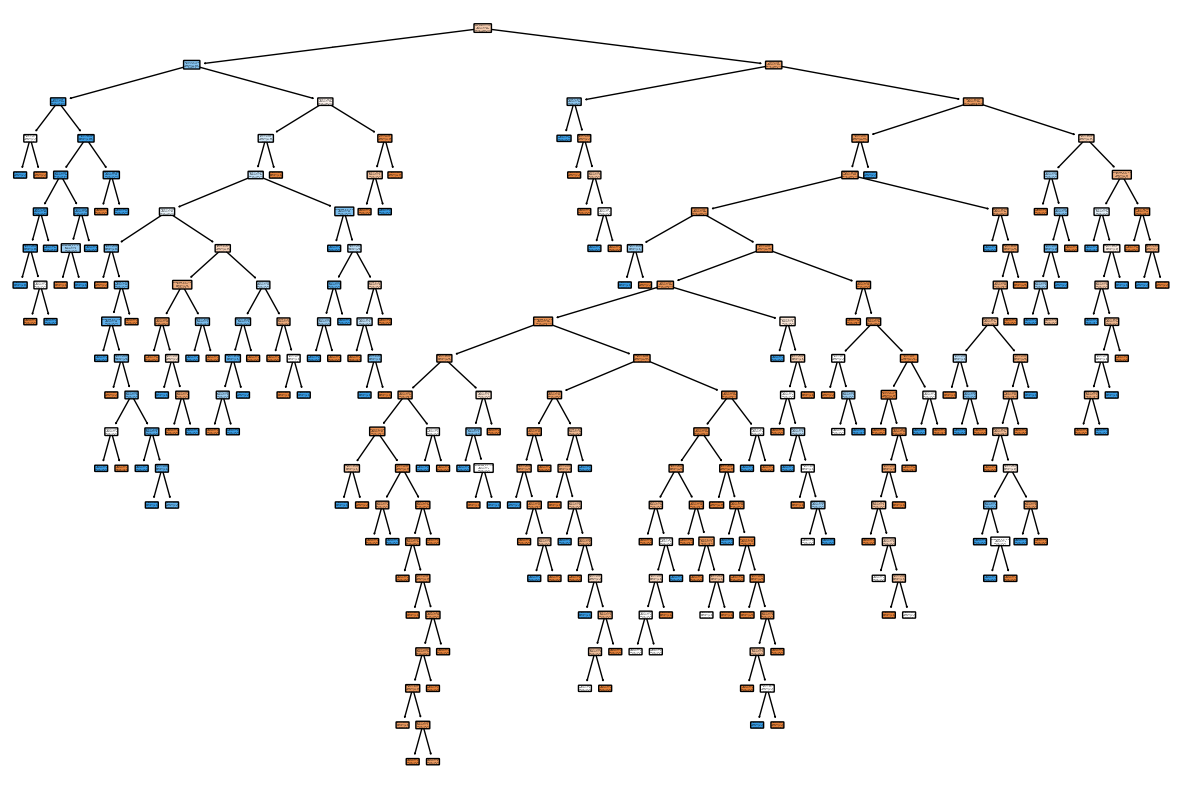

In [73]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set the figure size so the tree is legible
plt.figure(figsize=(15, 10))

# Plot the tree
plot_tree(model, 
          filled=True, 
          feature_names = x_train.columns,
          class_names = model.classes_.astype(str),
          rounded=True)

plt.show()

**Árbol podado**

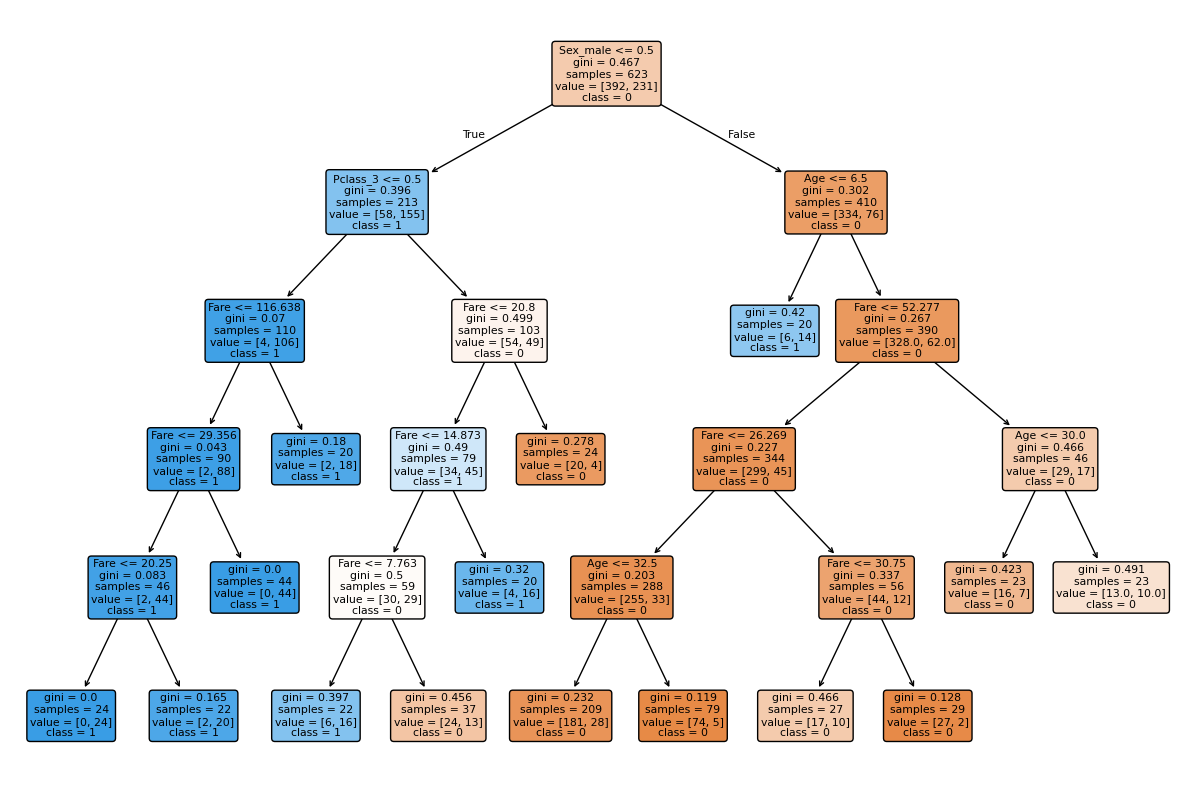

In [76]:
plt.figure(figsize=(15, 10))

# Saco el modelo que mejores resultados ha tenido
best_estimator = grid.best_estimator_

# Plot the tree
plot_tree(best_estimator, 
          filled=True, 
          feature_names = x_train.columns,
          class_names = model.classes_.astype(str),
          rounded=True)

plt.show()

Claramente han desaparecido muchísimas hojas (en el último se puede leer, por lo menos). Al no ser tan complejo no es tan sensible al ruido y, por lo tanto, es más general y menos sobreajustado.

#  **Ejemplo de Árboles de Decisión para Regresión**

Hasta ahora hemos visto que los **árboles de decisión** se utilizan principalmente para **clasificación**, es decir, para predecir **categorías** (por ejemplo: aprobado/suspenso, spam/no spam, enfermo/sano…).
Sin embargo, los árboles de decisión también pueden utilizarse para **regresión**, cuando lo que se desea predecir es un **valor numérico continuo**, como por ejemplo:

* El **precio de una vivienda**
* El **consumo eléctrico**
* La **nota media de un alumno**
* La **velocidad del viento**
* El **importe de una factura**

En este caso hablamos de **árboles de regresión**.

---

##  ¿Qué diferencia a un árbol de regresión de uno de clasificación?

La **estructura del árbol es casi idéntica**:

* Hay una **raíz**
* Hay **nodos intermedios**
* Hay **hojas**

La diferencia principal está en lo que ocurre en las **hojas**:

* En **clasificación**, cada hoja devuelve una **clase**
* En **regresión**, cada hoja devuelve un **valor numérico**, que suele ser:

> 🔹 **la media de los valores reales de las muestras que caen en esa hoja**

Es decir, el árbol **no inventa valores**, simplemente **promedia los datos reales que ya existen**.

## Funcionamiento del Árbol de Regresión

El árbol funciona así:

1. Toma los datos de entrenamiento.
2. Prueba todas las variables y muchos posibles cortes.
3. Divide el conjunto en dos partes.
4. Repite el proceso en cada parte.
5. Se detiene cuando:

   * Se alcanza una profundidad máxima.
   * O hay pocas muestras en un nodo.
   * O ya no se mejora la predicción.

Cuando llega a una hoja, el valor que devuelve es:

$
\hat{y} = \text{media de los valores reales de ese grupo}
$

## Función de Error: MSE (Error Cuadrático Medio)

En clasificación se usa **impureza (Gini o Entropía)**.
En regresión, el criterio de decisión es el **MSE (Mean Squared Error)**:

$
MSE = \frac{1}{m} \sum_{i=1}^{m} (\hat{y}_i - y_i)^2
$

Donde:

* $ y_i $ es el valor real
* $ \hat{y}_i $ es el valor predicho
* $ m $ es el número de muestras

El árbol intenta hacer divisiones que **minimicen este error**.

---

## Algoritmo CART aplicado a Regresión

Scikit-learn utiliza el algoritmo **CART (Classification And Regression Tree)** tanto en clasificación como en regresión.

En regresión, el criterio de división es:

$
J(k,t_k) = \frac{m_{left}}{m} MSE_{left} + \frac{m_{right}}{m} MSE_{right}
$

Es decir:

* Divide los datos en dos grupos.
* Calcula el error en cada grupo.
* Elige la división que produce **menor error total ponderado**.

⚠️ Este algoritmo es:

* **Greedy (avaro)** → solo busca la mejor división local.
* **No garantiza el árbol óptimo global**.
* Encontrar el árbol perfecto es un problema **NP–Completo**.

---

## Complejidad Computacional

### Predicción

La predicción consiste en recorrer el árbol desde la raíz hasta una hoja:

$
O(\log_2(m))
$

Ventaja clave:

✅ Es **muy rápida**

✅ No depende del número de variables

✅ Ideal para sistemas en tiempo real


###  Entrenamiento

El entrenamiento es más costoso:

$
O(n \cdot m \log_2(m))
$

Donde:

* ( n ) → número de características
* ( m ) → número de muestras

Por eso:

* Con pocos datos → entrenamiento rápido
* Con millones de datos → entrenamiento lento

---

## Problema Principal: Sobreajuste (Overfitting)

Los árboles de decisión **aprenden con muchísima precisión**, pero eso tiene un problema:

> Si no se limitan, **memorizan el ruido** de los datos.

Esto provoca:

* Excelente resultado en entrenamiento
* **Mal resultado en datos nuevos**

A esto lo llamamos **sobreajuste**.

##  Parámetros de Regularización

Para evitar el sobreajuste se usan estos parámetros:

| Parámetro           | Función                         |
| ------------------- | ------------------------------- |
| `max_depth`         | Limita la profundidad del árbol |
| `min_samples_leaf`  | Mínimo de muestras por hoja     |
| `min_samples_split` | Mínimo para dividir un nodo     |
| `max_leaf_nodes`    | Máximo número de hojas          |

👉 Aumentar estos valores = menos sobreajuste
👉 Disminuirlos = más riesgo de sobreajuste

## Ejemplo Práctico Interpretado

Se genera un conjunto de datos con esta forma:

$
y = (x - 0.5)^2 + \text{ruido}
$

In [77]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

In [78]:
# Generate noisy quadratic data
X = np.linspace(0, 1, 500)
y = (X - 0.5)**2 + np.random.randn(500) / 50.

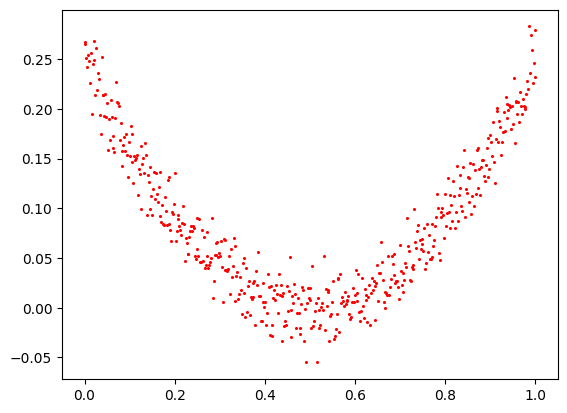

In [79]:
plt.scatter(X, y, s=1.5, c='red')


### Entrenamos un árbol con `max_depth = 2`

   ✔ Modelo simple
   
   ✔ Buena generalización

In [80]:
tree_reg = DecisionTreeRegressor(max_depth=2)

In [81]:
tree_reg.fit(X[..., None], y[..., None])

DecisionTreeRegressor(max_depth=2)

Visualización del árbol

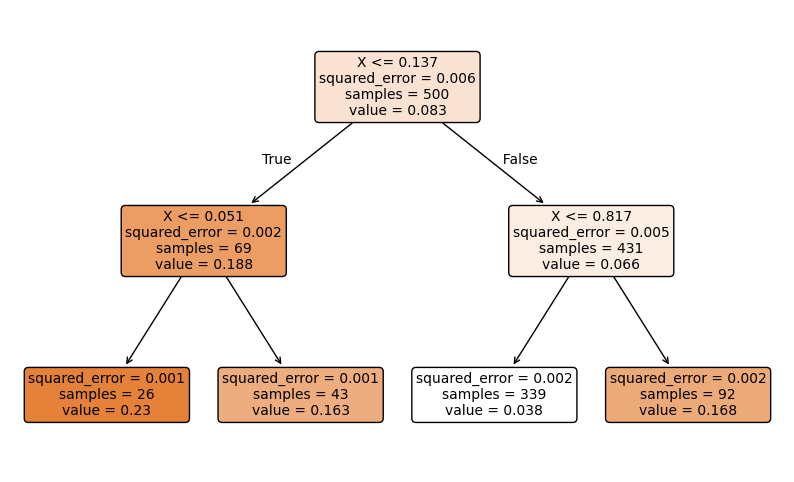

In [82]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plot_tree(
    tree_reg,
    feature_names=['X'],
    filled=True,
    rounded=True,
    fontsize=10
)
plt.show()


En este caso, el árbol funciona igual que en clasificación, pero cada hoja predice un **valor numérico**, correspondiente al **promedio de los valores reales** de las muestras que contiene.

---

### Predicciones


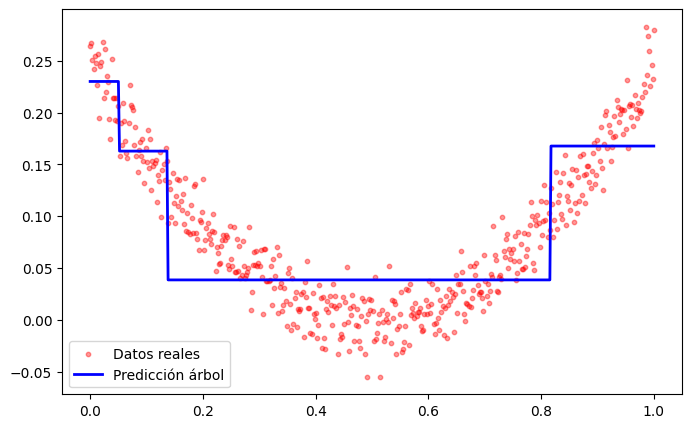

In [83]:
# Predicción sobre TODOS los puntos de X
y_pred = tree_reg.predict(X.reshape(-1,1))


# Gráfica
plt.figure(figsize=(8,5))
plt.scatter(X, y, s=10, color='red', alpha=0.4, label='Datos reales')
plt.plot(X, y_pred, color='blue', linewidth=2, label='Predicción árbol')
plt.legend()
plt.show()

### Entrenamos un árbol sin regularizar

❌ Memoriza el ruido

❌ Sobreajuste muy fuerte

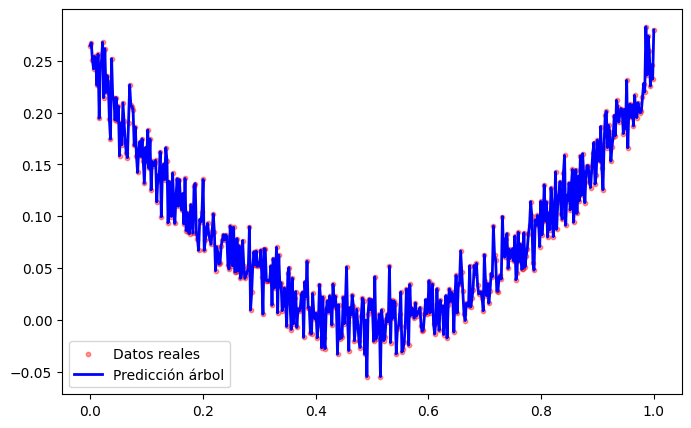

In [84]:
tree_no_reg = DecisionTreeRegressor()

tree_no_reg.fit(X[..., None], y[..., None])

# Predicción sobre TODOS los puntos de X
y_pred2 = tree_no_reg.predict(X.reshape(-1,1))


# Gráfica
plt.figure(figsize=(8,5))
plt.scatter(X, y, s=10, color='red', alpha=0.4, label='Datos reales')
plt.plot(X, y_pred2, color='blue', linewidth=2, label='Predicción árbol')
plt.legend()
plt.show()

### Árbol con min_samples_leaf = 10

✅ Modelo más estable

✅ Predicción más realista

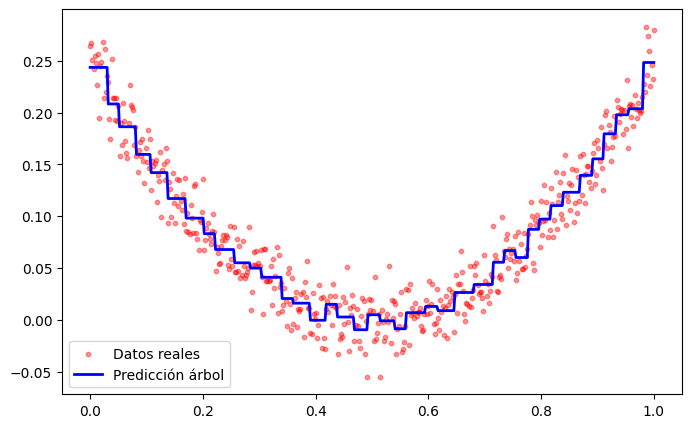

In [85]:
tree_reg_10 = DecisionTreeRegressor(min_samples_leaf=10)

tree_reg_10.fit(X[..., None], y[..., None])

# Predicción sobre TODOS los puntos de X
y_pred10 = tree_reg_10.predict(X.reshape(-1,1))


# Gráfica
plt.figure(figsize=(8,5))
plt.scatter(X, y, s=10, color='red', alpha=0.4, label='Datos reales')
plt.plot(X, y_pred10, color='blue', linewidth=2, label='Predicción árbol')
plt.legend()
plt.show()

## **Ejercicio propuesto: Crear un modelo de Árbol de Decisión para Regresión y compararlo con Regresión Lineal**

El objetivo de esta actividad es que el alumnado aprenda a:

* Entrenar un **modelo de Árbol de Decisión para Regresión (`DecisionTreeRegressor`)** sobre un dataset real.
* Comparar su rendimiento frente al modelo de **Regresión Lineal**.
* Identificar posibles casos de **sobreajuste (overfitting)**.
* Aplicar **regularización** en árboles de regresión.
* Interpretar la **importancia de las variables** en un modelo basado en árboles.

El alumnado trabajará con el **dataset del seguro médico**, ya utilizado previamente para Regresión Lineal:

* **insurance.csv** (coste de seguros médicos)

La variable objetivo es:

* **`charges` → coste anual del seguro**

### **PARTE 1 – Árbol de Decisión aplicado al dataset del Seguro Médico**



Implementamos el mismo flujo del notebook (carga → limpieza → transformación → división)



In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('data/insurance.csv')

##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

X = df.drop(['charges'], axis = 1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

#### **1. Crear el modelo de Árbol de Decisión básico**

<div style="background-color:green;color:white">

<br>

* Crea un modelo inicial sin regularizar:

<br>

In [88]:
model = DecisionTreeRegressor()

---

<div style="background-color:green;color:white">

<br>

* Entrena el modelo con los datos de entrenamiento (*X_train*, *y_train*).
* Realiza predicciones sobre el conjunto de test.

<br>

In [90]:
model.fit(X_train, y_train)

y_preds = model.predict(X_test)

#### **2. Evaluar el rendimiento del modelo**

<div style="background-color:green;color:white">

<br>

Calcula las siguientes métricas sobre el conjunto de test:

* **MAE**
* **MSE**
* **RMSE**
* **R²**

<br>

In [91]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
mse = mean_squared_error(y_test, y_preds)
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"R2: {r2_score(y_test, y_preds)}")

MAE: 777.8243395432693
MSE: 11358429.582529455
RMSE: 3370.2269333873433
R2: 0.9274076032914877


<div style="background-color:green;color:white">

<br>

Representa en un gráfico:

* *y_test* frente a *y_pred*

Guarda los valores obtenidos para compararlos más adelante con los otros modelos.


<br>

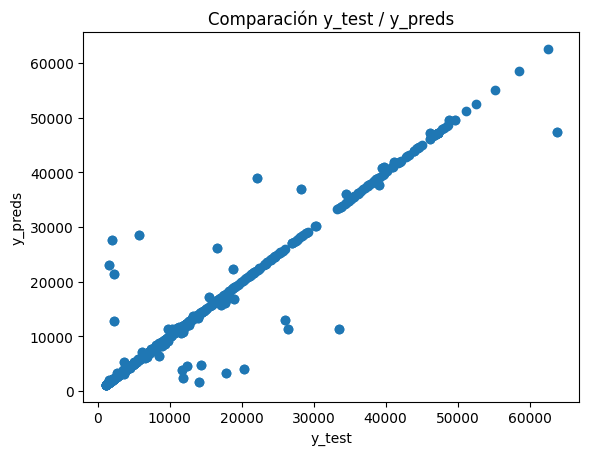

In [97]:
plt.scatter(y_test, y_preds)
plt.title("Comparación y_test / y_preds")
plt.ylabel("y_preds")
plt.xlabel("y_test")
plt.show()

#### **3. Detectar sobreajuste**

<div style="background-color:green;color:white">

<br>

Compara:

* El rendimiento del árbol en **entrenamiento**
* El rendimiento en **test**


<br>

In [98]:
print(f"Accuracy (Train): {model.score(X_train, y_train)}")
print(f"Accuracy (Test): {model.score(X_test, y_test)}")

Accuracy (Train): 1.0
Accuracy (Test): 0.9274076032914877


<div style="background-color:green;color:white">

<br>

Responde:

* ¿Existe una diferencia grande entre ambos resultados?
* ¿Indica esto un posible sobreajuste?
* ¿Por qué los árboles tienden a sobreajustar con facilidad?

<br>

La diferencia no es muy grande, ni siquiera una décima, pero la precisión en entrenamiento es perfecta. Esto puede indica que hay un sobreajuste fuerte.

Los árboles se tienden a sobreajustar con facilidad siempre que no se apliquen técnicas de regularización porque los algoritmos están hechos para procesar cada registro y adaptarse a ellos. El árbol está creando más y más decisiones hasta que es capaz de clasificar todo el conjunto de datos. Esto implica que también se está aprendiendo el ruido y que, por tanto, cuando entre un valor que no conozca, falle.

#### **4. Aplicar regularización al Árbol de Decisión**

<div style="background-color:green;color:white">

<br>
Entrena nuevos modelos **modificando hiperparámetros de regularización**, por ejemplo:

* *max_depth*
* *min_samples_leaf*
* *min_samples_split*

Puedes usar **GridSearchCV** para probar varias combinaciones y seleccionar la mejor.

<br>

In [99]:
grid_params = {
    "max_depth": [2, 3, 4, 5],
    "min_samples_leaf": [5, 10, 20],
    "min_samples_split": [10, 20, 30]
}

reg_tree = DecisionTreeRegressor()
grid = GridSearchCV(reg_tree, grid_params)
grid.fit(X_train, y_train)

y_preds_reg = grid.predict(X_test)

<div style="background-color:green;color:white">

<br>

Comparar el rendimiento entre:

* Árbol **sin regularización**
* Árbol **regularizado**


<br>

In [101]:
print("-- Árbol sin regularizar --")

print(f"MAE: {mean_absolute_error(y_test, y_preds)}")
mse = mean_squared_error(y_test, y_preds)
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"R2: {r2_score(y_test, y_preds)}")

print(f"Accuracy (Train): {model.score(X_train, y_train)}")
print(f"Accuracy (Test): {model.score(X_test, y_test)}")

print("\n -- Árbol regularizado --")
print(f"MAE: {mean_absolute_error(y_test, y_preds_reg)}")
mse = mean_squared_error(y_test, y_preds_reg)
print(f"MSE: {mse}")
print(f"RMSE: {np.sqrt(mse)}")
print(f"R2: {r2_score(y_test, y_preds_reg)}")

print(f"Accuracy (Train): {grid.best_estimator_.score(X_train, y_train)}")
print(f"Accuracy (Test): {grid.best_estimator_.score(X_test, y_test)}")

-- Árbol sin regularizar --
MAE: 777.8243395432693
MSE: 11358429.582529455
RMSE: 3370.2269333873433
R2: 0.9274076032914877
Accuracy (Train): 1.0
Accuracy (Test): 0.9274076032914877

 -- Árbol regularizado --
MAE: 2544.5106646004324
MSE: 22580190.55112084
RMSE: 4751.8617984029
R2: 0.8556886637953929
Accuracy (Train): 0.8836071298329834
Accuracy (Test): 0.8556886637953929


<div style="background-color:green;color:white">

<br>


* ¿Disminuye el sobreajuste?
* ¿Qué ocurre con el valor de R²?
* ¿Cuál de los dos modelos generaliza mejor?

<br>

Aunque las métricas parecen peores en el árbol regularizado, lo realmente importante es que tiene una precisión en entrenamiento creíble (`0.88`) y una precisión en test muy parecida (`0.85`). Esto indica que, en general está ajustando y generalizando mejor que el primero y que el árbol sin regularizar tiene unas métricas mejores porque se está aprendiendo los datos de memoria. Si le diéramos más datos, esas métricas bajarían rápidamente.

Por lo tanto disminuye el sobreajuste en el segundo y generaliza mejor, pero el R2 es más bajo porque no se sabe los datos de memoria.

### **Comparación con el modelo de Regresión Lineal**

<div style="background-color:green;color:white">

<br>

Utiliza las métricas obtenidas previamente con **Regresión Lineal** y construye una tabla comparativa:

| Modelo                | MAE | RMSE | R² |
| --------------------- | --- | ---- | -- |
| Regresión Lineal      | 4243.59 | 5857.05 | 0.77 |
| Árbol sin regularizar | 777.82 | 3370.22 | 0.92 |
| Árbol regularizado    | 2544.51 | 4751.86 | 0.855 |



Responde razonadamente:

* ¿Qué modelo obtiene mejor RMSE?
* ¿Qué modelo generaliza mejor?
* ¿En qué casos es preferible usar un árbol en lugar de una regresión lineal?
* ¿Qué modelo interpretarías mejor a nivel matemático?
* ¿Qué modelo tiene mayor capacidad de adaptación a relaciones no lineales?

<br>

- El mejor `RMSE` lo tiene el árbol sin regularizar. La expliación para esto es que se está aprendiendo los datos de memoria y no tenemos suficientes datos de test como para que empeore. Seguramente al seguir agregando datos de test este número se dispare, mientras que en los otros dos se quedaría estable.
- El que mejor generaliza es el regularizado. Lo hemos visto en que la precisión en entrenamiento es verosímil (`0.88`) y la precisión es test es muy parecida (`0.85`). En el sin regularizar tenemos una precisión de entrenamiento absurda (`1.00`) y con más diferencia en test (`0.92`). De nuevo, si aumentase el test, este número seguramente seguiría cayendo.
- Es preferible usar un árbol en lugar de una regresión lineal cuando queremos tener en cuenta todas las variables y no necesitamos pre-procesar tantos datos. Los árboles tienden a ser más eficiente y a requerir menos pre-procesamiento (estandarización, limpieza, etc) de datos que las regresiones lineales. También cuando tenemos datos que no tienen relación lineal entre ellos.
- A nivel matemático es mucho más fácil de interpretar una regresión lineal porque se basa en la fórmula de las rectas (`y = mx + b`). Los árboles tienen fórmulas matemáticas más complejas. De otro modo, en la representación visual, los árboles son muchos más visuales, ya que es posible que ha tenido en cuenta el modelo para tomar cada decisión.
- Los árboles tienen mejor capacidad de adaptación a las relaciones no lineales ya que no tienen que representar una línea. Para que una regresión lineal pueda adaptarse a datos no lineales, deben usarse regresiones polinómicas (que tienen a sobreajustar) o curvas, pero dejan de ser lineales y pasan a ser curvas.